## Creating a graph
Create an empty graph with no nodes and no edges.

In [1]:
import networkx as nx

In [2]:
G = nx.Graph()

By definition, a [Graph](https://networkx.github.io/documentation/networkx-1.9.1/reference/classes.graph.html#networkx.Graph) is a collection of nodes (vertices) along with identified pairs of nodes (called edges, links, etc). In NetworkX, nodes can be any hashable object e.g. a text string, an image, an XML object, another Graph, a customized node object, etc.

(Note: Python’s None object should not be used as a node as it determines whether optional function arguments have been assigned in many functions.)

### Base class for undirected graphs.

- A Graph stores __nodes__ and __edges__ with optional data, or attributes.

- Graphs hold undirected edges. Self loops are allowed but multiple (parallel) edges are not.

- Nodes can be arbitrary (hashable) Python objects with optional key/value attributes.

- Edges are represented as links between nodes with optional key/value attributes.

There are a few other types of graphs and we'll get to those later: 

- [digraph](https://networkx.github.io/documentation/networkx-1.9.1/reference/classes.digraph.html#networkx.DiGraph)
- [multigraph](https://networkx.github.io/documentation/networkx-1.9.1/reference/classes.multigraph.html#networkx.MultiGraph)
- [multidigraph](https://networkx.github.io/documentation/networkx-1.9.1/reference/classes.multidigraph.html#networkx.MultiDiGraph)

## [Nodes](https://networkx.github.io/documentation/networkx-1.9.1/tutorial/tutorial.html#nodes)

The graph G can be grown in several ways. NetworkX includes many graph generator functions and facilities to read and write graphs in many formats. To get started though we’ll look at simple manipulations. You can add one node at a time,


In [3]:
#add one node
G.add_node(1)

In [4]:
#add a list of nodes,
G.add_nodes_from([2,3])

### nbunch
or add any nbunch of nodes. An nbunch is any iterable container of nodes that is not itself a node in the graph. (e.g. a list, set, graph, file, etc..)

In [5]:
# add a new graph with 10 nodes
H = nx.path_graph(10)


In [6]:
# now add the nodes from H to G
G.add_nodes_from(H)

Note that G now contains the nodes of H as nodes of G. In contrast, you could use the graph H as a node in G.

In [7]:
G.add_node(H)

The graph G now contains H as a node. This flexibility is very powerful as it allows graphs of graphs, graphs of files, graphs of functions and much more. It is worth thinking about how to structure your application so that the nodes are useful entities. Of course you can always use a unique identifier in G and have a separate dictionary keyed by identifier to the node information if you prefer. (Note: You should not change the node object if the hash depends on its contents.)

## [Edges](https://networkx.github.io/documentation/networkx-1.9.1/tutorial/tutorial.html#edges)

G can also be grown by adding one edge at a time,

In [8]:
G.add_edge(1,2)
e=(2,3)
G.add_edge(*e) # unpack edge tuple*

or by adding a list of edges,


In [9]:
G.add_edges_from([(1,2),(1,3)])

or by adding any ebunch of edges. An ebunch is any iterable container of edge-tuples. An edge-tuple can be a 2-tuple of nodes or a 3-tuple with 2 nodes followed by an edge attribute dictionary, e.g. (2,3,{‘weight’:3.1415}). Edge attributes are discussed further below

In [10]:
G.add_edges_from(H.edges())

One can demolish the graph in a similar fashion; using [Graph.remove_node()](https://networkx.github.io/documentation/networkx-1.9.1/reference/generated/networkx.Graph.remove_node.html#networkx.Graph.remove_node), [Graph.remove_nodes_from()](https://networkx.github.io/documentation/networkx-1.9.1/reference/generated/networkx.Graph.remove_nodes_from.html#networkx.Graph.remove_nodes_from), [Graph.remove_edge()](https://networkx.github.io/documentation/networkx-1.9.1/reference/generated/networkx.Graph.remove_edge.html#networkx.Graph.remove_edge) and [Graph.remove_edges_from()](https://networkx.github.io/documentation/networkx-1.9.1/reference/generated/networkx.Graph.remove_edges_from.html#networkx.Graph.remove_edges_from), e.g.

In [11]:
G.remove_node(H)

There are no complaints when adding existing nodes or edges. For example, after removing all nodes and edges,



In [12]:
G.clear()

we add new nodes/edges and NetworkX quietly ignores any that are already present.

In [13]:
G.add_edges_from([(1,2),(1,3)])
G.add_node(1)
G.add_edge(1,2)
G.add_node("spam")       # adds node "spam"
G.add_nodes_from("spam") # adds 4 nodes: 's', 'p', 'a', 'm'

At this stage the graph G consists of 8 nodes and 2 edges, as can be seen by:

In [14]:
G.number_of_nodes()

8

In [15]:
G.number_of_edges()

2

We can examine them with

In [16]:
G.nodes()

NodeView((1, 2, 3, 'spam', 's', 'p', 'a', 'm'))

In [17]:
G.edges()

EdgeView([(1, 2), (1, 3)])

In [18]:
G.neighbors(1)

Removing nodes or edges has similar syntax to adding:

In [19]:
G.remove_nodes_from("spam")

In [20]:
G.nodes()

NodeView((1, 2, 3, 'spam'))

In [21]:
G.remove_edge(1,3)

When creating a graph structure (by instantiating one of the graph classes you can specify data in several formats.

In [22]:
# create a DiGraph using the connections from G
H=nx.DiGraph(G)

In [23]:
H.edges()

OutEdgeView([(1, 2), (2, 1)])

In [24]:
edgelist=[(0,1),(1,2),(2,3)]

In [25]:
H=nx.Graph(edgelist)

### What to use as nodes and edges
You might notice that nodes and edges are not specified as NetworkX objects. This leaves you free to use meaningful items as nodes and edges. The most common choices are numbers or strings, but a node can be any hashable object (except None), and an edge can be associated with any object x using G.add_edge(n1,n2,object=x).

As an example, n1 and n2 could be protein objects from the RCSB Protein Data Bank, and x could refer to an XML record of publications detailing experimental observations of their interaction.

We have found this power quite useful, but its abuse can lead to unexpected surprises unless one is familiar with Python. If in doubt, consider using [convert_node_labels_to_integers()](https://networkx.github.io/documentation/networkx-1.9.1/reference/generated/networkx.relabel.convert_node_labels_to_integers.html?highlight=convert_node_labels_to_integers) to obtain a more traditional graph with integer labels.

## [Accessing edges](https://networkx.github.io/documentation/networkx-1.9.1/tutorial/tutorial.html#accessing-edges)

In addition to the methods [Graph.nodes()](https://networkx.github.io/documentation/networkx-1.9.1/reference/generated/networkx.Graph.nodes.html#networkx.Graph.nodes), [Graph.edges()](https://networkx.github.io/documentation/networkx-1.9.1/reference/generated/networkx.Graph.edges.html#networkx.Graph.edges), and [Graph.neighbors()](https://networkx.github.io/documentation/networkx-1.9.1/reference/generated/networkx.Graph.neighbors.html#networkx.Graph.neighbors), iterator versions (e.g. [Graph.edges_iter()](https://networkx.github.io/documentation/networkx-1.9.1/reference/generated/networkx.Graph.edges_iter.html#networkx.Graph.edges_iter)) can save you from creating large lists when you are just going to iterate through them anyway.

Fast direct access to the graph data structure is also possible using subscript notation.

Warning:
***Do not change the returned dict–it is part of the graph data structure and direct manipulation may leave the graph in an inconsistent state.***

In [26]:
# Warning: do not change the resulting dict
G[1]

AtlasView({2: {}})

In [27]:
G[1][2]

{}

You can safely set the attributes of an edge using subscript notation if the edge already exists.

In [28]:
G.add_edge(1,3)

In [29]:
G[1][3]['color']='blue'

Fast examination of all edges is achieved using nodes in networkx 2.0. Note that for undirected graphs this actually looks at each edge twice.

In [30]:
FG=nx.Graph()

FG.add_weighted_edges_from([(1,2,0.125),(1,3,0.75),(2,4,1.2),(3,4,0.375)])

#this is currently not printing out extended attributes
for n,nbrs in list(FG.nodes(data=True)):
    for nbr,eattr in nbrs.items():
        print('nodes')
        data=eattr['weight']
        if data<0.5: print('(%d, %d, %.3f)' % (n,nbr,data))

In [31]:
list(FG.nodes)

[1, 2, 3, 4]

In [32]:
list(FG.edges)

[(1, 2), (1, 3), (2, 4), (3, 4)]

In [33]:
FG.graph

{}

## Adding attributes to graphs, nodes, and edges
Attributes such as weights, labels, colors, or whatever Python object you like, can be attached to graphs, nodes, or edges.

Each graph, node, and edge can hold key/value attribute pairs in an associated attribute dictionary (the keys must be hashable). By default these are empty, but attributes can be added or changed using add_edge, add_node or direct manipulation of the attribute dictionaries named G.graph, G.node and G.edge for a graph G.

### Graph attributes
Assign graph attributes when creating a new graph

In [34]:
G = nx.Graph(day="Friday")

In [35]:
G.graph

{'day': 'Friday'}

### Node attributes
Add node attributes using add_node(), add_nodes_from() or G.node

In [36]:
G.add_node(1, time='5pm')

In [37]:
G.add_nodes_from([3], time='2pm')

In [38]:
G.nodes[1]

{'time': '5pm'}

In [39]:
G.nodes[1]['room'] = 714

In [40]:
G.nodes(data=True)

NodeDataView({1: {'time': '5pm', 'room': 714}, 3: {'time': '2pm'}})

### Edge Attributes
Add edge attributes using add_edge(), add_edges_from(), subscript notation, or G.edge.

In [41]:
G.add_edge(1, 2, weight=4.7 )

In [42]:
G.add_edges_from([(3,4),(4,5)], color='red')

In [43]:
G.add_edges_from([(1,2,{'color':'blue'}), (2,3,{'weight':8})])

In [44]:
G[1][2]['weight'] = 4.7

### Directed graphs
The DiGraph class provides additional methods specific to directed edges, e.g. DiGraph.out_edges(), DiGraph.in_degree(), DiGraph.predecessors(), DiGraph.successors() etc. To allow algorithms to work with both classes easily, the directed versions of neighbors() and degree() are equivalent to successors() and the sum of in_degree() and out_degree() respectively even though that may feel inconsistent at times.

In [45]:
DG=nx.DiGraph()

In [46]:
DG.add_weighted_edges_from([(1,2,0.5), (3,1,0.75)])

In [47]:
DG.out_degree(1,weight='weight')

0.5

In [48]:
DG.degree(1,weight='weight')

1.25

In [49]:
DG.successors(1)

In [50]:
DG.neighbors(1)

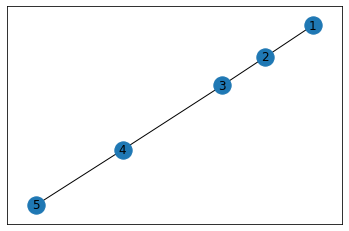

In [53]:
nx.draw_networkx(G)

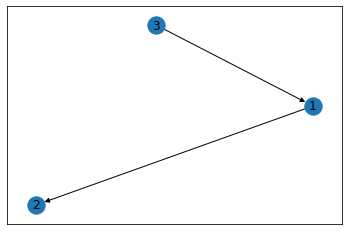

In [54]:
nx.draw_networkx(DG)

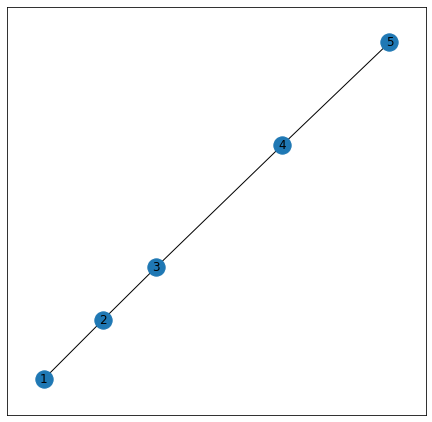

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7.5, 7.5))
nx.draw_networkx(G)
plt.show()

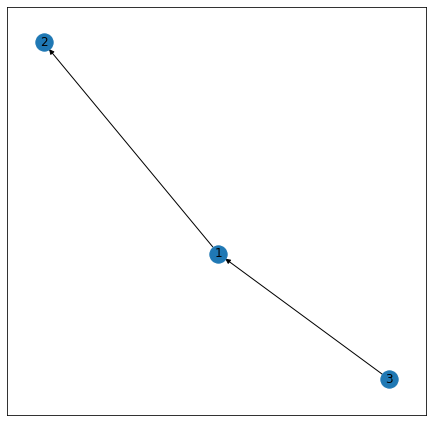

In [56]:
plt.figure(figsize=(7.5, 7.5))
nx.draw_networkx(DG)
plt.show()

ready-made networks available in NetworkX: Zachary's karate club (Zachary, 1977)

This network represents the friendships (edges) between members (nodes) of a karate club studied between 1970 and 1972. This particular karate club has long been of interest to sociologists and network scientists, because it eventually split into two different clubs after a disagreement between the instructor and the club president (this might explain why there aren't any famous studies of conflict resolution clubs). In the original study, Zachary used the network structure to predict which members would join which of the two clubs with near-perfect accuracy!


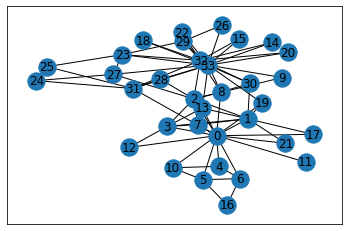

In [57]:
#karate club network 
G = nx.karate_club_graph()
karate_pos = nx.spring_layout(G, k=0.3)
nx.draw_networkx(G, karate_pos)

In [58]:
list(G.nodes)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33]

In [59]:
list(G.edges)

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 17),
 (0, 19),
 (0, 21),
 (0, 31),
 (1, 2),
 (1, 3),
 (1, 7),
 (1, 13),
 (1, 17),
 (1, 19),
 (1, 21),
 (1, 30),
 (2, 3),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 13),
 (2, 27),
 (2, 28),
 (2, 32),
 (3, 7),
 (3, 12),
 (3, 13),
 (4, 6),
 (4, 10),
 (5, 6),
 (5, 10),
 (5, 16),
 (6, 16),
 (8, 30),
 (8, 32),
 (8, 33),
 (9, 33),
 (13, 33),
 (14, 32),
 (14, 33),
 (15, 32),
 (15, 33),
 (18, 32),
 (18, 33),
 (19, 33),
 (20, 32),
 (20, 33),
 (22, 32),
 (22, 33),
 (23, 25),
 (23, 27),
 (23, 29),
 (23, 32),
 (23, 33),
 (24, 25),
 (24, 27),
 (24, 31),
 (25, 31),
 (26, 29),
 (26, 33),
 (27, 33),
 (28, 31),
 (28, 33),
 (29, 32),
 (29, 33),
 (30, 32),
 (30, 33),
 (31, 32),
 (31, 33),
 (32, 33)]

In [60]:
mr_hi = 0
mr_hi in G 

True

In [61]:
G.has_node(mr_hi) 

True

In [62]:
hi_list = list(G.neighbors(mr_hi))

In [63]:
print(hi_list)

[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31]


In [64]:
print(f'Mr. Hi has {len(hi_list)} friends')

Mr. Hi has 16 friends


In [65]:
member_id = 1
(mr_hi, member_id) in G.edges

True

In [66]:
G.has_edge(mr_hi, member_id)

True

In [67]:
john_a = 33
(mr_hi, john_a) in G.edges

False

In [68]:
G.has_edge(mr_hi, john_a)

False

### continuting to add attributes to nodes and edges
Each node and edge can have a set of attributes to store this additional information. Attributes can simply be a convenient place to store information related to the nodes and edges, or they can be used by visualizations and network algorithms.

In [69]:
member_club = [ 
    0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 
    0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 
    1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 
    1, 1, 1, 1]

In [70]:
for node_id in G.nodes: 
    G.nodes[node_id]["club"] = member_club[node_id]

In [71]:
G.add_node(11, club=0)

In [72]:
G.nodes[mr_hi] 

{'club': 0}

In [73]:
G.nodes[john_a]

{'club': 1}

It looks like Mr. Hi and John A really don't get along very well and ended up joining different clubs. We can visualize these different clubs by using different colors.

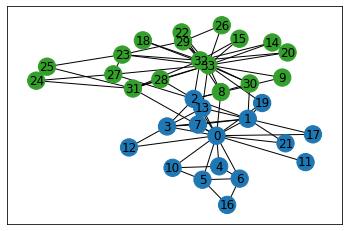

In [74]:
#nx.draw_networkx_nodes(G, pos, node_size=200, node_color='#00b4d9')
node_colors = [ 
    '#1f78b4' if G.nodes[v]["club"] == 0 
    else '#33a02c' for v in G] 
nx.draw_networkx(G, karate_pos, label=True, node_color=node_colors)

In [75]:
# Iterate through all edges 
for v, w in G.edges: 
    # Compare `club` property of edge endpoints 
    # Set edge `internal` property to True if they match 
    if G.nodes[v]["club"] == G.nodes[w]["club"]: 
        G.edges[v, w]["internal"] = True 
    else: 
        G.edges[v, w]["internal"] = False 

In [76]:
internal = [e for e in G.edges if G.edges[e]["internal"]] 
external = [e for e in G.edges if ~G.edges[e]["internal"]]

{0: Text(0.04055335165170526, -0.3407045972692292, '0'),
 1: Text(0.13091277299353965, -0.17993502959073782, '1'),
 2: Text(-0.02525092579920373, 0.008864799672733088, '2'),
 3: Text(-0.10236285599910694, -0.2531304423133571, '3'),
 4: Text(0.048237153709153976, -0.6324433001182839, '4'),
 5: Text(0.00016826922210305445, -0.7600188694467328, '5'),
 6: Text(0.10749834931297028, -0.7494994954014182, '6'),
 7: Text(-0.013062784794683696, -0.23488854244593388, '7'),
 8: Text(0.053175669813842856, 0.07484975848235631, '8'),
 9: Text(0.230588411511586, 0.21257346054777604, '9'),
 10: Text(-0.08640650248690734, -0.6465618329539727, '10'),
 11: Text(0.2978899456961402, -0.5925180773463338, '11'),
 12: Text(-0.21217293581545735, -0.4527699296077946, '12'),
 13: Text(-0.0005768614550327552, -0.07836496688488168, '13'),
 14: Text(0.20187916870326414, 0.5464117546156069, '14'),
 15: Text(0.10692692414745032, 0.5821747231293485, '15'),
 16: Text(0.07127610015627782, -1.0, '16'),
 17: Text(0.3192688

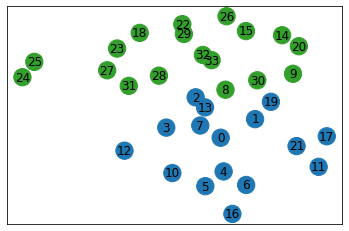

In [77]:
# Draw nodes and node labels 
nx.draw_networkx_nodes(G, karate_pos, node_color=node_colors) 
nx.draw_networkx_labels(G, karate_pos) 

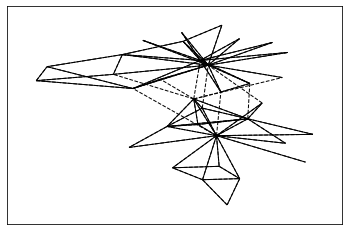

In [78]:
# Draw internal edges as solid lines 
nx.draw_networkx_edges(G, karate_pos, edgelist=internal) 
# Draw external edges as dashed lines 
nx.draw_networkx_edges(G, karate_pos, edgelist=external, style="dashed")

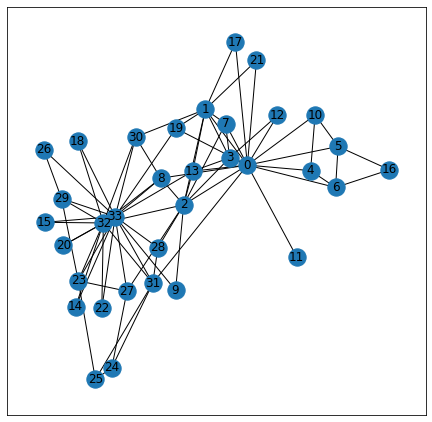

In [79]:
plt.figure(figsize=(7.5, 7.5))
nx.draw_networkx(G)
plt.show()

In [80]:
def tie_strength(G, v, w): 
    # Get neighbors of nodes v and w in G 
    v_neighbors = set(G.neighbors(v)) 
    w_neighbors = set(G.neighbors(w)) 
    # Return size of the set intersection 
    return 1 + len(v_neighbors & w_neighbors) 

In [81]:
# Calculate weight for each edge 
# for v, w in G.edges: 
#    G.edges[v, w]["weight"] = tie_strength(G, v, w) 
# Store weights in a list 
#    edge_weights = [G.edges[v, w]["weight"] for v, w in G.edges]